In [20]:
from keras.utils import np_utils
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [2]:
import pickle
pickle_in = open("cleandata.pickle","rb")
dicta = pickle.load(pickle_in)
X = dicta['x']
Y = dicta['y']
nb_classes = 8
X
X = np.array(X)

In [3]:
X

array([[[  9,  22,  30, ...,  33,  42,  43],
        [  9,  18,  29, ...,  32,  41,  43],
        [ 10,  28,  37, ...,  32,  39,  43],
        ...,
        [169, 174, 173, ...,  53,  55,  64],
        [167, 175, 174, ...,  52,  56,  69],
        [162, 172, 174, ...,  53,  56,  67]],

       [[ 11,   8,  11, ...,  75,  81,  89],
        [ 12,  11,  16, ...,  67,  77,  83],
        [ 12,  13,  21, ...,  81,  88,  89],
        ...,
        [ 47,  64,  70, ...,  33,  38,  31],
        [ 41,  48,  64, ...,  31,  34,  29],
        [ 52,  40,  49, ...,  43,  39,  35]],

       [[ 92,  93,  93, ..., 107, 107, 106],
        [ 92,  91,  91, ..., 108, 107, 104],
        [ 92,  91,  91, ..., 108, 105, 102],
        ...,
        [104, 107, 108, ...,  90,  95, 104],
        [103, 107, 110, ...,  95, 105, 116],
        [102, 107, 110, ..., 108, 118, 127]],

       ...,

       [[ 39,  19,  21, ..., 100,  95,  97],
        [ 13,  30,  44, ..., 100,  95,  99],
        [ 18,  36,  44, ...,  98,  99,  99

In [4]:
print(len(X),len(Y))

12758 12758


In [5]:
label=[]
for i in Y:
    var = 0
    if i=="anger":
        var = 1
    elif i=="surprise":
        var = 2
    elif i=="happiness":
        var = 3
    elif i =="neutral":
        var = 0
    elif i=="disgust":
        var = 4
    elif i=="fear":
        var = 5
    elif i=="contempt":
        var = 6
    else: #sadness
        var = 7 
    label.append(var)
Y = np.array(label)
Y

array([0, 3, 0, ..., 0, 3, 0])

In [6]:
y = np_utils.to_categorical(Y, nb_classes).astype(np.float32)
y
# prepare weighting for classes since they're unbalanced
class_totals = y.sum(axis=0)
class_weight = class_totals.max() / class_totals
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
X=X.reshape(12758,64,64,1)
X.shape[1:]

(64, 64, 1)

In [9]:
y.shape

(12758, 8)

Keras Model : 

In [30]:
nb_filters = 32
nb_pool = 2
nb_conv = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [31]:
validation_split = 0.10
model.fit(X, y, batch_size=10, class_weight=class_weight, epochs=10, verbose=1, validation_split=validation_split)

Train on 11482 samples, validate on 1276 samples
Epoch 1/10
11482/11482 [==============================] - 15s 1ms/step - loss: 1.0244 - acc: 0.6147 - val_loss: 0.6726 - val_acc: 0.7578
Epoch 2/10
11482/11482 [==============================] - 14s 1ms/step - loss: 0.6911 - acc: 0.7683 - val_loss: 0.6940 - val_acc: 0.7821
Epoch 3/10
11482/11482 [==============================] - 15s 1ms/step - loss: 0.6187 - acc: 0.7932 - val_loss: 0.5976 - val_acc: 0.7876
Epoch 4/10
11482/11482 [==============================] - 16s 1ms/step - loss: 0.5948 - acc: 0.8024 - val_loss: 0.5585 - val_acc: 0.8143
Epoch 5/10
11482/11482 [==============================] - 16s 1ms/step - loss: 0.5636 - acc: 0.8101 - val_loss: 0.5683 - val_acc: 0.8049
Epoch 6/10
11482/11482 [==============================] - 15s 1ms/step - loss: 0.5873 - acc: 0.7902 - val_loss: 0.5308 - val_acc: 0.8221
Epoch 7/10
11482/11482 [==============================] - 15s 1ms/step - loss: 0.5392 - acc: 0.8188 - val_loss: 0.5687 - val_acc:

In [24]:
open('model.json', 'w').write(model.to_json())
model.save_weights('weights.h5')

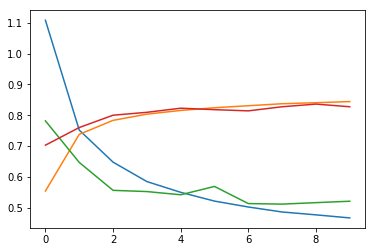

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(model.model.history.history['loss'])
plt.plot(model.model.history.history['acc'])
plt.plot(model.model.history.history['val_loss'])
plt.plot(model.model.history.history['val_acc'])
plt.show()